In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from chainconsumer import ChainConsumer
from sbi_lens.config import config_lsst_y_10

In [ ]:
# plot params

plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams["lines.linewidth"] = 1
plt.rcParams['lines.markersize'] = 3
color = [
   '#f8c471',
    '#d68910',
    '#cd6155',
    '#edbb99',
    '#5d6d7e',
    '#73c6b6',
    '#a3b899'
]

In [2]:
from sbi_lens.config import config_lsst_y_10

params_name = config_lsst_y_10.params_name_latex
truth = config_lsst_y_10.truth

In [3]:
table = pd.read_table("../results/store_experiments.csv", sep=',')

c2st_info = table.loc[(
    (table['sbi_method'] == 'nle') & (table['score_weight']==0.00000) & (table['c2st'] < 0.607) & (table['c2st'] > 0.599)& (table['nb_simulations'] == 1000)
)]

In [4]:
c2st_info

,experiment_id,sbi_method,total_steps,activ_fun,nb_simulations,score_weight,n_flow_layers,n_bijector_layers,seed,nf type,batch size,score type,score noise,c2st
83,exp_nle_70000_1000_3_4_2_silu_affine_128_0.0_u...,nle,70000,silu,1000,0.0,4,2,3,affine,128,unmarginal,0.0,0.6068
182,exp_nle_70000_1000_6_4_2_silu_affine_128_0.0_u...,nle,70000,silu,1000,0.0,4,2,6,affine,128,unmarginal,0.0,0.6030


In [5]:
exp_id = c2st_info['experiment_id'][83]
posterior = np.load('../results/experiments/{}/posteriors_sample.npy'.format(exp_id))

In [6]:
exp_id

'exp_nle_70000_1000_3_4_2_silu_affine_128_0.0_unmarginal_0.0'

In [7]:
truth = config_lsst_y_10.truth
params_name = config_lsst_y_10.params_name_latex
path_to_access_sbi_lens = '/gpfswork/rech/eqw/ufa23yn'

sample_ff = np.load(
    f"{path_to_access_sbi_lens}/sbi_lens/sbi_lens/data/posterior_full_field__256N_10ms_27gpa_0.26se.npy"
)

# sample_ps = np.load(
#     f"{path_to_access_sbi_lens}/sbi_lens/sbi_lens/data/posterior_power_spectrum__256N_10ms_27gpa_0.26se.npy"
# )
sample_ps = np.load(
    "posterior_power_spectrum__256N_10ms_27gpa_0.26se.npy"
)

In [21]:
import numpy as np
from getdist import plots, MCSamples
import matplotlib.pyplot as plt

g = plots.get_subplot_plotter(width_inch=7, scaling=False)
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.8
g.settings.title_limit_fontsize = 14

param_names = ['omega_c', 'omega_b', 'sigma_8', 'h_0', 'n_s', 'w_0']
param_labels = [r'\Omega_c', r'\Omega_b', r'\sigma_8', r'h_0', r'n_s', r'w_0']

samples_ei = MCSamples(samples=sample_ff, names=param_names, labels=param_labels)
samples_ii = MCSamples(samples=posterior, names=param_names, labels=param_labels)

marker_positions_truth = {
    'omega_c': truth[0],
    'omega_b': truth[1],
    'sigma_8': truth[2],
    'h_0': truth[3],
    'n_s': truth[4],
    'w_0': truth[5],
}


g.triangle_plot(
    [samples_ei, samples_ii],
    params=param_names,# Add parameter names here
    filled=[False,True],
    legend_labels=['Explicit Inference','Implicit Inference'], 
    legend_loc='upper right',
    line_args=[{'lw':2, 'color': "#1B2631",},{'lw':2, 'color':'#2980B9',}],
    contour_colors=['#1B2631','#2980B9'],
    contour_args=[{'lw':2, 'ls':'--'},{'lw':2, }],
    markers = marker_positions_truth,
    # marker_args = {'lw': 0.8,}
)
g.export(f'contour_plot_cvg_c2st.pdf')

Removed no burn in
Removed no burn in


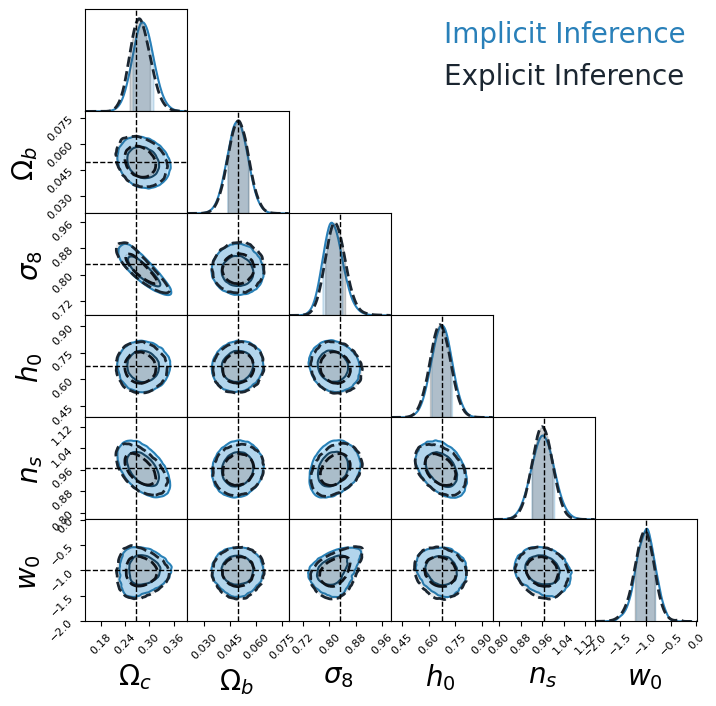

In [11]:
c = ChainConsumer()

c.add_chain(
        posterior,
        parameters=params_name,
        name='Implicit Inference',
        linewidth=1.5,
        color = '#2980B9',
        shade_alpha = 0.3
)

c.add_chain(
        sample_ff,
        parameters=params_name,
        name='Explicit Inference',
        linewidth=2,
        color =  "#1B2631", #color[4], 
        shade_alpha = 0.1,
        linestyle = '--'
)

c.configure(legend_kwargs={"fontsize": 20}, tick_font_size=8, label_font_size=20)
fig = c.plotter.plot(
    figsize=0.8,
    truth=truth,
    extents=[[t - 5 * np.std(sample_ff[:,i]),
              t + 5 * np.std(sample_ff[:,i])] for i,t in enumerate(truth)]
)

plt.savefig('contour_plot_cvg_c2st.pdf')

In [25]:
import numpy as np
from getdist import plots, MCSamples
import matplotlib.pyplot as plt

g = plots.get_subplot_plotter(width_inch=7, scaling=False)
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.8
g.settings.title_limit_fontsize = 14

param_names = ['omega_c', 'omega_b', 'sigma_8', 'h_0', 'n_s', 'w_0']
param_labels = [r'\Omega_c', r'\Omega_b', r'\sigma_8', r'h_0', r'n_s', r'w_0']

samples_ei = MCSamples(samples=sample_ps, names=param_names, labels=param_labels)
samples_ii = MCSamples(samples=sample_ff, names=param_names, labels=param_labels)

marker_positions_truth = {
    'omega_c': truth[0],
    'omega_b': truth[1],
    'sigma_8': truth[2],
    'h_0': truth[3],
    'n_s': truth[4],
    'w_0': truth[5],
}


g.triangle_plot(
    [samples_ei, samples_ii],
    params=param_names,# Add parameter names here
    filled=[True,True],
    legend_labels=['Explicit Inference Power Spectrum','Explicit Inference HMC'], 
    legend_loc='upper right',
    line_args=[{'lw':2, 'color': '#5d6d7e',},{'lw':2, 'color':'#2980B9',}],
    contour_colors=['#5d6d7e','#2980B9'],
    contour_args=[{'lw':2, },{'lw':2, }],
    markers = marker_positions_truth,
    # marker_args = {'lw': 0.8,}
)
g.export('contour_plot_sbi_lens.pdf')

Removed no burn in
Removed no burn in


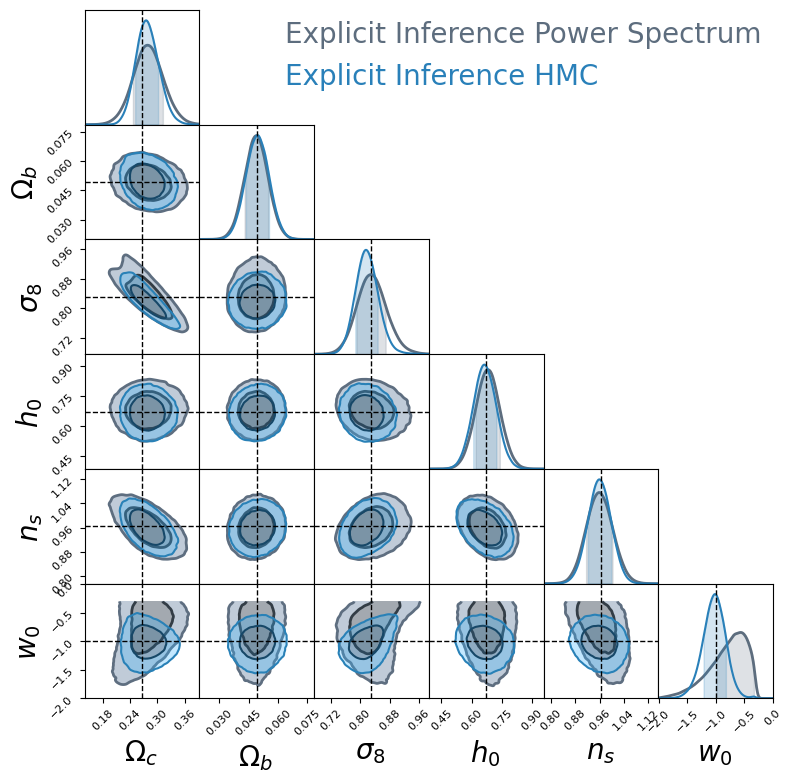

In [13]:
c = ChainConsumer()

c.add_chain(
        sample_ps,
        parameters=params_name,
        name='Explicit Inference Power Spectrum',
        linewidth=2,
        color =  color[4], #"#111111",
        shade_alpha = 0.5
)

c.add_chain(
        sample_ff,
        parameters=params_name,
        name='Explicit Inference HMC',
        linewidth=1.5,
        color = '#2980B9',
        shade_alpha = 0.3
)

c.configure(legend_kwargs={"fontsize": 20}, tick_font_size=8, label_font_size=20)
fig = c.plotter.plot(
    figsize=0.9,
    truth=truth,
    extents=[[t - 5 * np.std(sample_ff[:,i]),
              t + 5 * np.std(sample_ff[:,i])] for i,t in enumerate(truth)]
)

plt.savefig('contour_plot_sbi_lens.pdf')

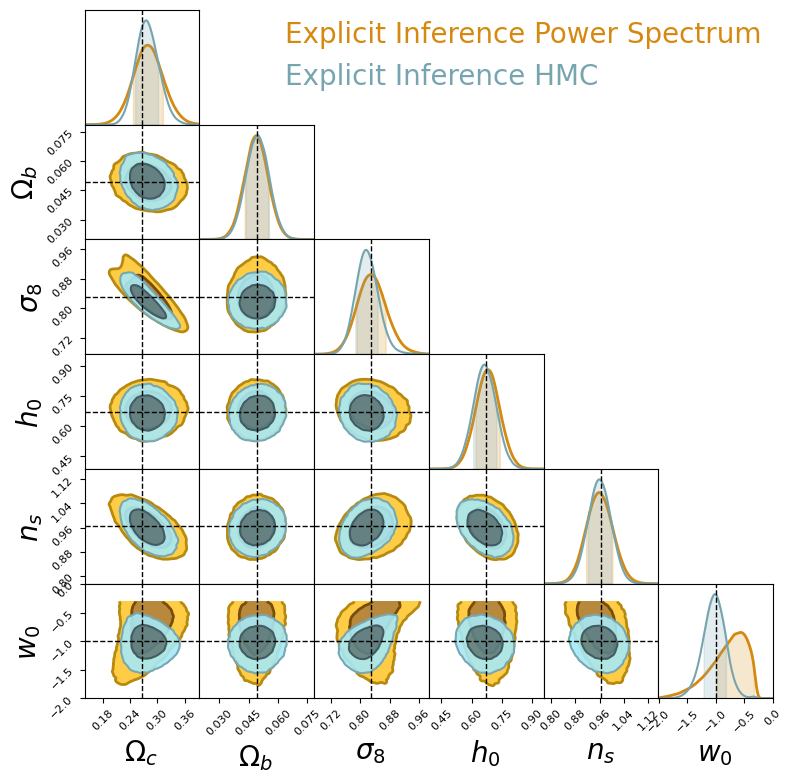

In [13]:
c = ChainConsumer()

c.add_chain(
        sample_ps,
        parameters=params_name,
        name='Explicit Inference Power Spectrum',
        linewidth=2,
        color =  '#d68910',
        shade_alpha = 0.8
)
c.add_chain(
        sample_ff,
        parameters=params_name,
        name='Explicit Inference HMC',
        linewidth=1.5,
        color = "#76a5af",
        shade_alpha = .9
)

c.configure(legend_kwargs={"fontsize": 20}, tick_font_size=8, label_font_size=20)
fig = c.plotter.plot(
    figsize=0.9,
    truth=truth,
    extents=[[t - 5 * np.std(sample_ff[:,i]),
              t + 5 * np.std(sample_ff[:,i])] for i,t in enumerate(truth)]
)

plt.savefig('contour_plot_sbi_lens.png',transparent=True)

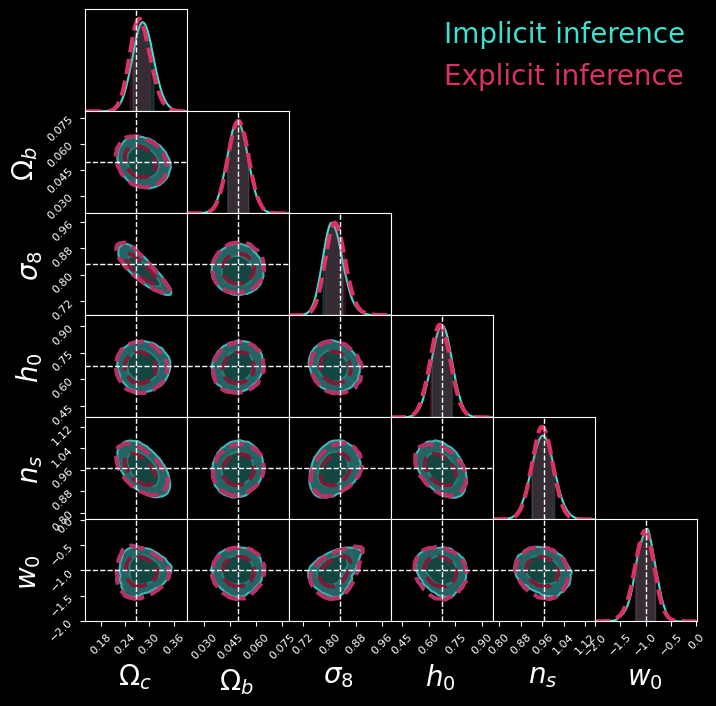

In [16]:
plt.style.use("dark_background")

c = ChainConsumer()

c.add_chain(
        posterior,
        parameters=params_name,
        name='Implicit inference',
        linewidth=1.5,
        color = "#40E0D0",
        shade_alpha = 0.4
)

c.add_chain(
        sample_ff,
        parameters=params_name,
        name='Explicit inference',
        linewidth=3,
        color =  "#DE3163",
        shade_alpha = 0.,
        linestyle = '--'
)
# c.add_marker(4*np.ones(6), name="", marker_style="$+$", marker_size=8, color='black')
c.configure(legend_kwargs={"fontsize": 20}, tick_font_size=8, label_font_size=20)
c.configure_truth(color='w', ls="--", linewidth=1.)

fig = c.plotter.plot(
    figsize=0.8,
    truth=truth,
    extents=[[t - 5 * np.std(sample_ff[:,i]),
              t + 5 * np.std(sample_ff[:,i])] for i,t in enumerate(truth)]
)

plt.savefig('contour_plot_cvg_c2st2.png', transparent=True)